In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/content/CO2_fugacity_coefficient_data_duan_sun.xlsx")
data.head()

,"T, C","P, bar",CO2_Fugacity_coefficient
0,0,1,0.9931
1,0,20,0.8648
2,0,50,0.5695
3,0,100,0.3152
4,0,200,0.1914


In [3]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]
y = y.values.reshape(-1,1)
print("the shape of X is {} and the shape of the target y is {}".format(X.shape, y.shape))

the shape of X is (430, 2) and the shape of the target y is (430, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
type(np.array(X_test))

numpy.ndarray

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [7]:
from sklearn import svm
regressor = svm.SVR(kernel='linear')
regressor.fit(X_train,y_train.ravel())

SVR(kernel='linear')

In [8]:
regressor1 = svm.SVR(kernel='poly')
regressor1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [9]:
regressor2 = svm.SVR(kernel='rbf')
regressor2.fit(X_train,y_train.ravel())

SVR()

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=2, random_state=1)
regressor3.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=2, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(random_state= 1)
regressor4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [12]:
yhat = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
yhat1 = sc_y.inverse_transform(regressor1.predict(sc_X.transform(X_test)).reshape(-1,1))
yhat2 = sc_y.inverse_transform(regressor2.predict(sc_X.transform(X_test)).reshape(-1,1))
yhat3 = sc_y.inverse_transform(regressor3.predict(sc_X.transform(X_test)).reshape(-1,1))
yhat4 = sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_test)).reshape(-1,1))

In [13]:
from sklearn.metrics import r2_score
print("Linear")
print("-"*40)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat) )
print(" ")
print("Polynomial")
print("-"*40)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat1 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat1 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat1) )
print(" ")
print("RBF")
print("-"*40)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat2 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat2 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat2) )
print(" ")
print("Random Forest")
print("-"*40)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat3 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat3 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat3) )
print(" ")
print("Decision Tree Regressor")
print("-"*40)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat4 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat4 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat4) )

Linear
----------------------------------------
Mean absolute error: 13.09
Residual sum of squares (MSE): 405.44
R2-score: 0.11
 
Polynomial
----------------------------------------
Mean absolute error: 17.34
Residual sum of squares (MSE): 455.61
R2-score: -0.00
 
RBF
----------------------------------------
Mean absolute error: 14.82
Residual sum of squares (MSE): 267.21
R2-score: 0.41
 
Random Forest
----------------------------------------
Mean absolute error: 1.22
Residual sum of squares (MSE): 27.41
R2-score: 0.94
 
Decision Tree Regressor
----------------------------------------
Mean absolute error: 1.78
Residual sum of squares (MSE): 88.49
R2-score: 0.81


In [17]:
# save all the predictions to csv file for plotting
preds = pd.concat([pd.DataFrame(y_test), pd.DataFrame(yhat1), pd.DataFrame(yhat2), pd.DataFrame(yhat3), pd.DataFrame(yhat4)], axis =1)
#preds.to_csv('preds.csv')
preds


,0,0,0,0,0
0,4.1525,17.592561,14.891605,4.09730,3.9523
1,1.0778,2.169754,19.300134,1.08610,1.0887
2,0.4828,20.674632,17.753316,0.52945,0.5029
3,4.8431,18.176670,20.345768,5.23930,5.2393
4,0.1380,19.461323,19.053104,0.14490,0.1332
...,...,...,...,...,...
81,0.8870,24.310430,21.078225,0.78615,0.7839
82,7.4372,20.130392,3.518524,6.57680,8.1448
83,0.1914,23.570897,22.236056,0.31520,0.3152
84,2.3232,32.335646,20.935792,2.32650,2.4456


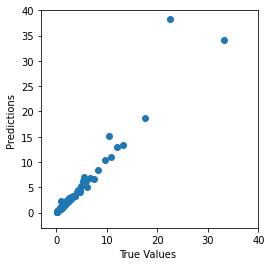

In [18]:
plt.scatter(y_test, yhat3)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('scaled')
plt.plot(range(6))
plt.xlim(-3, 40)
plt.ylim(-3, 40)
plt.gca().set_aspect('equal', adjustable='box')